In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation
import seaborn as sns
from datetime import datetime

In [15]:
df_1 = pd.read_csv(".\\audiobooks.csv")
df_2 = pd.read_csv(".\\audiobooks_2.csv")
df = df_1.merge(df_2, on='audiobook_id')
df = df[['price', 'release_date', 'length', 'rating_overall', 'rating_performance', 'rating_story']].dropna()

def convert_time(time_str):
    year = time_str[-2:]
    time_str = time_str[:-2] + '20' + year
    date_time = datetime.strptime(time_str, '%m-%d-%Y')
    return date_time.timestamp()

def convert_duration(length):
    # 9 hrs and 15 mins
    
    if 'hrs' in length:
        hours = length.split('hrs')[0].strip() # 9
    else:
        hours = length.split('hr')[0].strip() # 9
    if 'mins' in length:
        minutes = length[:-5].split(' ')[-1] # 15
        time = int(hours)*60 + int(minutes)
    else:
        time = int(hours)*60
    return time

df['release_date'] = df['release_date'].apply(convert_time)
df['length'] = df['length'].apply(convert_duration)
df['price'] = df['price'].apply(lambda s : float(s[1:]))
df.head()

,price,release_date,length,rating_overall,rating_performance,rating_story
0,25.51,1.667257e+09,529,4.6,4.7,4.6
1,23.62,1.666044e+09,521,4.7,4.8,4.6
2,26.90,1.662415e+09,1446,4.8,4.9,4.7
3,13.99,1.659996e+09,386,4.9,4.9,4.9
4,35.00,1.666044e+09,1042,4.6,4.7,4.5


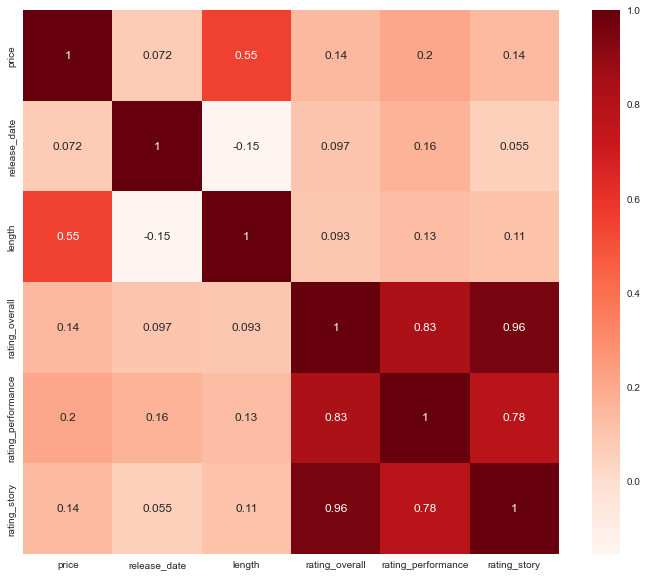

In [16]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()